## <center>Групповая работа второй группы</center> 
###  <center>по теме: "Charles Book Club Case"</center>

*Импортируем библиотеки* 

Numpy необходим для вычеслении в Pyhton

Pandas – библиотека Python для обработки и анализа данных

Matplotlib - библиотека для построения научных графиков в Python

В библиотеке scikit-learn имеется довольно много алгоритмов  классификации, которые мы используем для построения моделей

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score, roc_curve

Считываем файл, и закидываем в переменную df

In [4]:
df = pd.read_csv('CBC_4000.csv')

После смотрим таблицы и ее значения 

In [5]:
df

,Gender,Monetary,Recency,Frequency,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeoBks,ItalCook,ItalAtlas,ItalArt,Related_purch,M_code,F_code,R_code,Florence
0,1,297.0,14.0,2.0,22.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,2.0,0.0
1,0,128.0,8.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,2.0,0.0
2,1,138.0,22.0,7.0,56.0,2.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,4.0,4.0,3.0,0.0
3,1,228.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0
4,1,257.0,10.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,141.0,2.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0
3996,1,357.0,16.0,9.0,52.0,1.0,1.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,4.0,3.0,0.0
3997,0,48.0,12.0,1.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0
3998,0,214.0,14.0,7.0,38.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,3.0,0.0


После получаем краткий обзор набора данных, для этого используем фунцию info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         4000 non-null   int64  
 1   Monetary       4000 non-null   float64
 2   Recency        4000 non-null   float64
 3   Frequency      4000 non-null   float64
 4   FirstPurch     4000 non-null   float64
 5   ChildBks       4000 non-null   float64
 6   YouthBks       4000 non-null   float64
 7   CookBks        4000 non-null   float64
 8   DoItYBks       4000 non-null   float64
 9   RefBks         4000 non-null   float64
 10  ArtBks         4000 non-null   float64
 11  GeoBks         4000 non-null   float64
 12  ItalCook       4000 non-null   float64
 13  ItalAtlas      4000 non-null   float64
 14  ItalArt        4000 non-null   float64
 15  Related_purch  4000 non-null   float64
 16  M_code         4000 non-null   float64
 17  F_code         4000 non-null   float64
 18  R_code  

В переменную x записываются признаки, а в y ответы (столбец Florence)


In [7]:
x = df.drop('Florence', axis=1)
y = df['Florence']

Далее отбираем признаки с помощью классификатора ExtraTreesClassifier с параметром n_estimators (количество деревьев в лесу) равным 10

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10)
model.fit(x, y)
print(model.feature_importances_)

[0.01647997 0.27062384 0.07362714 0.05558371 0.10701642 0.04057327
 0.03235259 0.04036792 0.04033721 0.03942774 0.0424342  0.03938161
 0.0206664  0.00954658 0.01061461 0.05311231 0.06166256 0.03345465
 0.01273727]


По результатам работы ExtraTreesClassifier, самыми значимыми признаками стали: "Monetary","Recency","Frequency","FirstPurch","Related_purch","M_code","F_code","R_code"

Записываем полученные признаки в матрицу X

In [9]:
X=df[["Monetary","Recency","Frequency","FirstPurch","Related_purch","M_code","F_code","R_code"]]

train_test_split - функция разделяем на обучающие и тестовые данные

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Построение модели LogisticRegression

Строем модель LogisticRegression с параметрами по умолчанию и обучаю ее на тренировочных данных

In [11]:
C = 1e-2

In [12]:
lr = LogisticRegression(C=C)
result = lr.fit(X_train,y_train)

C:\Users\Kralz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Сохраняем результат работы модели на тестовых данных в переменную lr_predictions

In [13]:
lr_predictions = lr.predict_proba(X_test)[:, 1]

Задаем пороговые значения 0.2, 0.5 и 0.8

In [14]:
lr_predictions_2 = np.where(lr_predictions > 0.2, 1, 0)
lr_predictions_5 = np.where(lr_predictions > 0.5, 1, 0)
lr_predictions_8 = np.where(lr_predictions > 0.8, 1, 0)

In [15]:
for i, j in zip(X_train.columns, lr.coef_[0]):
    print(i.ljust(15), j)

Monetary        -9.69637983528624e-05
Recency         -0.012117701710514127
Frequency       0.04112444057084582
FirstPurch      -0.005479068537944295
Related_purch   0.21317272075535595
M_code          0.0035088271546704656
F_code          -0.1285566730442637
R_code          -0.05369704226403013


Находим accuracy score для каждого порогового значения

In [16]:
print('Оценка точности для 0.2: ', accuracy_score(y_test, lr_predictions_2))
print('Оценка точности для 0.5: ', accuracy_score(y_test, lr_predictions_5))
print('Оценка точности для 0.8: ', accuracy_score(y_test, lr_predictions_8))

Оценка точности для 0.2:  0.9133333333333333
Оценка точности для 0.5:  0.9175
Оценка точности для 0.8:  0.9175


Строем матрицы ошибок для LogisticRegression

In [17]:
confusion_matrix_log_2 = confusion_matrix(y_test, lr_predictions_2)
confusion_matrix_log_5 = confusion_matrix(y_test, lr_predictions_5)
confusion_matrix_log_8 = confusion_matrix(y_test, lr_predictions_8)

Text(0.5, 1.0, 'Матрицы ошибок для 0.8')

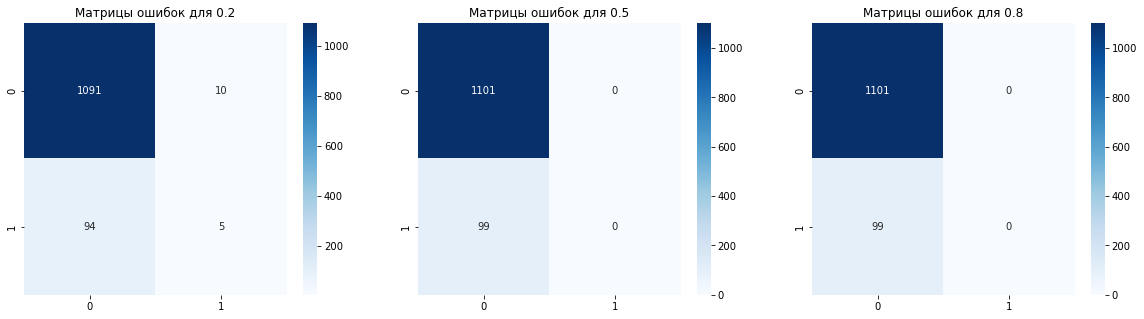

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.heatmap(confusion_matrix_log_2, annot=True, fmt='.0f', cmap='Blues', ax=ax[0])
ax[0].set_title('Матрицы ошибок для 0.2')
sns.heatmap(confusion_matrix_log_5, annot=True, fmt='.0f', cmap='Blues', ax=ax[1])
ax[1].set_title('Матрицы ошибок для 0.5')
sns.heatmap(confusion_matrix_log_8, annot=True, fmt='.0f', cmap='Blues', ax=ax[2])
ax[2].set_title('Матрицы ошибок для 0.8')
# fig.show()

Строем AUC ROC для каждой порговой вероятности

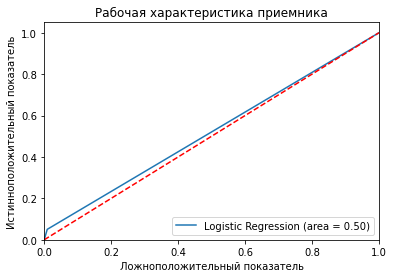

In [19]:
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr_predictions_2)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительный показатель')
plt.ylabel('Истинноположительный показатель')
plt.title('Рабочая характеристика приемника')
plt.legend(loc="lower right")
plt.show()


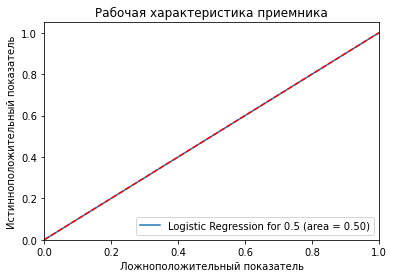

In [20]:
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr_predictions_5)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression for 0.5 (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительный показатель')
plt.ylabel('Истинноположительный показатель')
plt.title('Рабочая характеристика приемника')
plt.legend(loc="lower right")
plt.show()

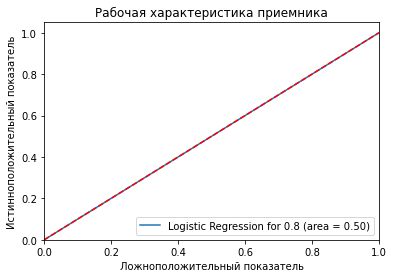

In [21]:
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr_predictions_8)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression for 0.8 (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительный показатель')
plt.ylabel('Истинноположительный показатель')
plt.title('Рабочая характеристика приемника')
plt.legend(loc="lower right")
plt.show()

### Построение модели DecisionTreeClassifier

Строим модель DecisionTreeClassifier с максимальной глубиной 10 и обучаю ее на тренировочных данных

In [22]:
dt = DecisionTreeClassifier(max_depth = 10)

In [23]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [24]:
dt_predictions = dt.predict_proba(X_test)[:, 1]

Визуализирую модель DecisionTreeClassifier

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
from sklearn.tree import export_graphviz
from sklearn import tree

Populating the interactive namespace from numpy and matplotlib


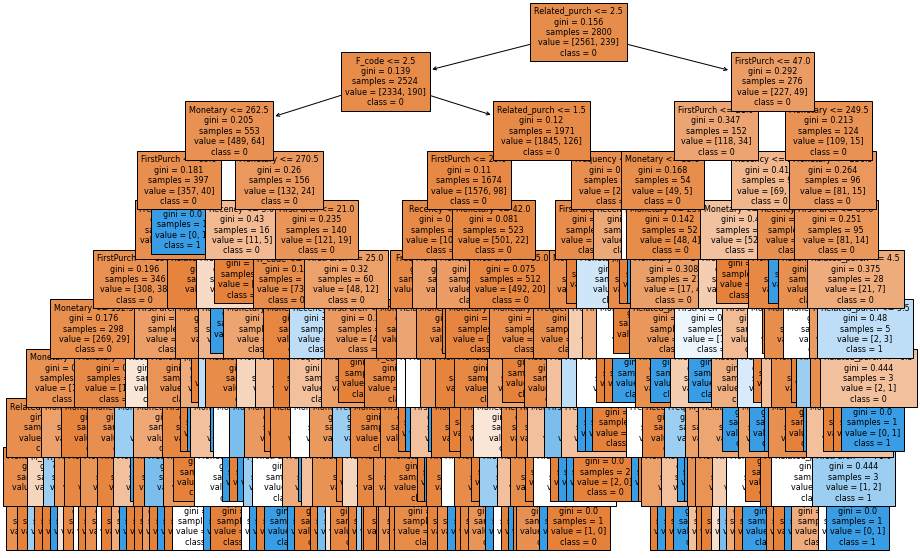

In [26]:
fig = plt.figure(figsize = (15, 10))
_ = tree.plot_tree(dt, fontsize=8,
                   feature_names=["Monetary","Recency","Frequency","FirstPurch","Related_purch","M_code","F_code","R_code"],
                   class_names=['0', '1'],
                   filled=True )

Задаем пороговые значения 

In [27]:
dt_predictions_2 = np.where(dt_predictions > 0.2, 1, 0)
dt_predictions_5 = np.where(dt_predictions > 0.5, 1, 0)
dt_predictions_8 = np.where(dt_predictions > 0.8, 1, 0)

Находим accuracy score для пороговых значений вероятности

In [28]:
print('Оценка точности для 0.2: ', accuracy_score(y_test, dt_predictions_2))
print('Оценка точности для 0.5: ', accuracy_score(y_test, dt_predictions_5))
print('Оценка точности для 0.8: ', accuracy_score(y_test, dt_predictions_8))

Оценка точности для 0.2:  0.8675
Оценка точности для 0.5:  0.8825
Оценка точности для 0.8:  0.8825


Строем матрицы ошибок для DecisionTreeClassifier

In [29]:
confusion_matrix_dt_2 = confusion_matrix(y_test, dt_predictions_2)
confusion_matrix_dt_5 = confusion_matrix(y_test, dt_predictions_5)
confusion_matrix_dt_8 = confusion_matrix(y_test, dt_predictions_8)

Text(0.5, 1.0, 'Матрицы ошибок для 0.8')

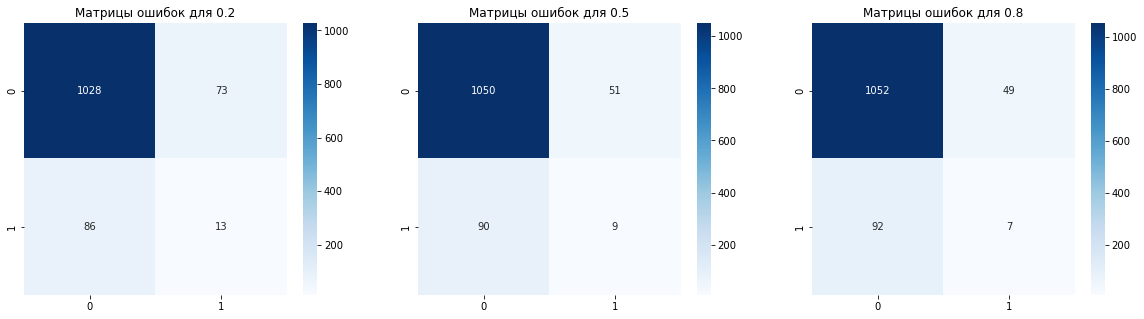

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.heatmap(confusion_matrix_dt_2, annot=True, fmt='.0f', cmap='Blues', ax=ax[0])
ax[0].set_title('Матрицы ошибок для 0.2')
sns.heatmap(confusion_matrix_dt_5, annot=True, fmt='.0f', cmap='Blues', ax=ax[1])
ax[1].set_title('Матрицы ошибок для 0.5')
sns.heatmap(confusion_matrix_dt_8, annot=True, fmt='.0f', cmap='Blues', ax=ax[2])
ax[2].set_title('Матрицы ошибок для 0.8')
# fig.show()

Строем AUC ROC для каждой порговой вероятности

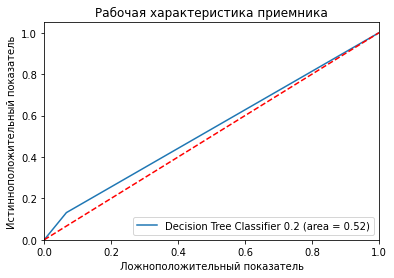

In [31]:
dt_roc_auc = roc_auc_score(y_test, dt.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dt_predictions_2)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classifier 0.2 (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительный показатель')
plt.ylabel('Истинноположительный показатель')
plt.title('Рабочая характеристика приемника')
plt.legend(loc="lower right")
plt.show()

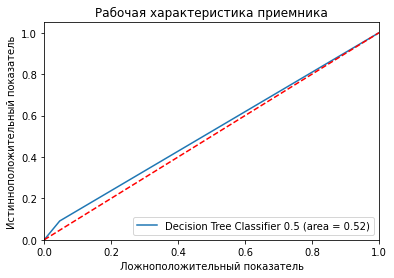

In [32]:
dt_roc_auc = roc_auc_score(y_test, dt.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dt_predictions_5)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classifier 0.5 (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительный показатель')
plt.ylabel('Истинноположительный показатель')
plt.title('Рабочая характеристика приемника')
plt.legend(loc="lower right")
plt.show()

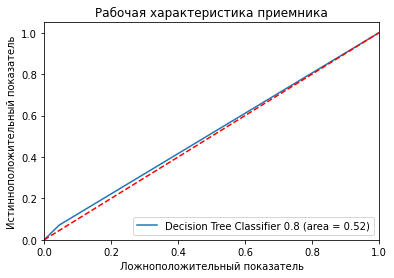

In [33]:
dt_roc_auc = roc_auc_score(y_test, dt.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dt_predictions_8)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classifier 0.8 (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительный показатель')
plt.ylabel('Истинноположительный показатель')
plt.title('Рабочая характеристика приемника')
plt.legend(loc="lower right")
plt.show()

### Построение модели GradientBoostingClassifier


In [65]:
from sklearn.ensemble import GradientBoostingClassifier

Строем модель GradientBoostingClassifier с параметрами n_estimators = 100 (количество этапов), learning_rate = 1.0 (влияние каждого дерева на конечный результат), max_depth = 1(максимальная глубина) и обучаю ее на обучающих данных

In [66]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [67]:
gb_predictions = gb.predict_proba(X_test)[:, 1]

Задаем пороговые значения

In [68]:
gb_predictions_2 = np.where(gb_predictions > 0.2, 1, 0)
gb_predictions_5 = np.where(gb_predictions > 0.5, 1, 0)
gb_predictions_8 = np.where(gb_predictions > 0.8, 1, 0)

Строем матрицы ошибок для GradientBoostingClassifier

In [69]:
confusion_matrix_gb_2 = confusion_matrix(y_test, gb_predictions_2)
confusion_matrix_gb_5 = confusion_matrix(y_test, gb_predictions_5)
confusion_matrix_gb_8 = confusion_matrix(y_test, gb_predictions_8)

Text(0.5, 1.0, 'Матрицы ошибок для 0.8')

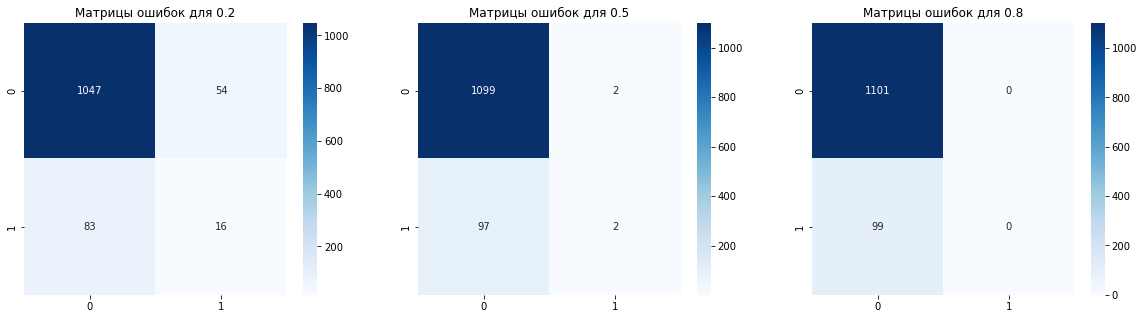

In [70]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.heatmap(confusion_matrix_gb_2, annot=True, fmt='.0f', cmap='Blues', ax=ax[0])
ax[0].set_title('Матрицы ошибок для 0.2')
sns.heatmap(confusion_matrix_gb_5, annot=True, fmt='.0f', cmap='Blues', ax=ax[1])
ax[1].set_title('Матрицы ошибок для 0.5')
sns.heatmap(confusion_matrix_gb_8, annot=True, fmt='.0f', cmap='Blues', ax=ax[2])
ax[2].set_title('Матрицы ошибок для 0.8')

Строем AUC ROC для каждой порговой вероятности

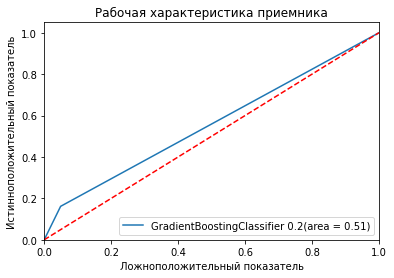

In [71]:
gb_roc_auc = roc_auc_score(y_test, gb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gb_predictions_2)
plt.figure()
plt.plot(fpr, tpr, label='GradientBoostingClassifier 0.2(area = %0.2f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительный показатель')
plt.ylabel('Истинноположительный показатель')
plt.title('Рабочая характеристика приемника')
plt.legend(loc="lower right")
plt.show()

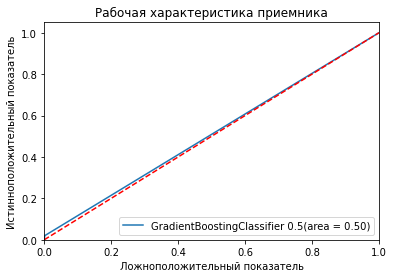

In [62]:
gb_roc_auc = roc_auc_score(y_test, gb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gb_predictions_5)
plt.figure()
plt.plot(fpr, tpr, label='GradientBoostingClassifier 0.5(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительный показатель')
plt.ylabel('Истинноположительный показатель')
plt.title('Рабочая характеристика приемника')
plt.legend(loc="lower right")
plt.show()

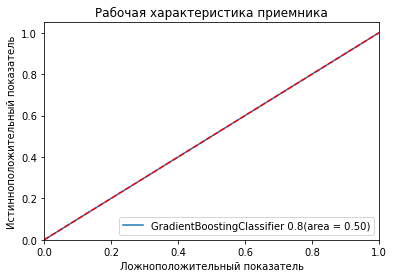

In [63]:
gb_roc_auc = roc_auc_score(y_test, gb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gb_predictions_8)
plt.figure()
plt.plot(fpr, tpr, label='GradientBoostingClassifier 0.8(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительный показатель')
plt.ylabel('Истинноположительный показатель')
plt.title('Рабочая характеристика приемника')
plt.legend(loc="lower right")
plt.show()

### Нахождение значений Accuracy for Florence=1, Accuracy for Florence=0, Total Accuracy

In [64]:
tn_log2, fp_log2, fn_log2, tp_log2 = confusion_matrix_log_2.ravel()
tn_log5, fp_log5, fn_log5, tp_log5 = confusion_matrix_log_5.ravel()
tn_log8, fp_log8, fn_log8, tp_log8 = confusion_matrix_log_8.ravel()

Accuracy for Florence=1, Accuracy for Florence=0, Total Accuracy для LogisticRegression 0.2

In [79]:
TotalA_log_2 = (tn_log2 + tp_log2) / (tn_log2 + tp_log2 + fp_log2 + fn_log2)
TPR_log_2 = tp_log2/(tp_log2 + fn_log2)
FPR_log_2 = fp_log2/(fp_log2 + tn_log2)
print("Total accuracy = ",TotalA_log_2)
print("TPR LogReg 0.2:", TPR_log_2)
print("FPR LogReg 0.2", FPR_log_2)

Total accuracy =  0.9133333333333333
TPR LogReg 0.2: 0.050505050505050504
FPR LogReg 0.2 0.009082652134423252


Accuracy for Florence=1, Accuracy for Florence=0, Total Accuracy для LogisticRegression 0.5


In [80]:
TotalA_log_5 = (tn_log5 + tp_log5) / (tn_log5 + tp_log5 + fp_log5 + fn_log5)
TPR_log_5 = tp_log5/(tp_log5 + fn_log5)
FPR_log_5 = fp_log5/(fp_log5 + tn_log5)
print("Total accuracy = ",TotalA_log_5)
print("TPR LogReg 0.5:", TPR_log_5)
print("FPR LogReg 0.5", FPR_log_5)

Total accuracy =  0.9175
TPR LogReg 0.5: 0.0
FPR LogReg 0.5 0.0


Accuracy for Florence=1, Accuracy for Florence=0, Total Accuracy для LogisticRegression 0.8

In [46]:
TotalA_log_8 = (tn_log8 + tp_log8) / (tn_log8 + tp_log8 + fp_log8 + fn_log8)
TPR_log_8 = tp_log8/(tp_log8 + fn_log8)
FPR_log_8 = fp_log8/(fp_log8 + tn_log8)
print("Total accuracy = ",TotalA_log_8)
print("TPR 0.8:", TPR_log_8)
print("FPR 0.8", FPR_log_8)

Toral accuracy =  0.9175
TPR 0.8: 0.0
FPR 0.8 0.0


In [47]:
tn_dt2, fp_dt2, fn_dt2, tp_dt2 = confusion_matrix_dt_2.ravel()
tn_dt5, fp_dt5, fn_dt5, tp_dt5 = confusion_matrix_dt_5.ravel()
tn_dt8, fp_dt8, fn_dt8, tp_dt8 = confusion_matrix_dt_8.ravel()

Accuracy for Florence=1, Accuracy for Florence=0, Total Accuracy для Decision Tree Classifier 0.2

In [48]:
TotalA_dt_2 = (tn_dt2 + tp_dt2) / (tn_dt2 + tp_dt2 + fp_dt2 + fn_dt2)
TPR_dt_2 = tp_dt2/(tp_dt2 + fn_dt2)
FPR_dt_2 = fp_dt2/(fp_dt2 + tn_dt2)
print("Toral accuracy = ",TotalA_dt_2)
print("TPR DT 0.2:", TPR_dt_2)
print("FPR DT 0.2", FPR_dt_2)

Toral accuracy =  0.8675
TPR DT 0.2: 0.13131313131313133
FPR DT 0.2 0.06630336058128973


Accuracy for Florence=1, Accuracy for Florence=0, Total Accuracy для Decision Tree Classifier 0.5

In [49]:
TotalA_dt_5 = (tn_dt5 + tp_dt5) / (tn_dt5 + tp_dt5 + fp_dt5 + fn_dt5)
TPR_dt_5 = tp_dt5/(tp_dt5 + fn_dt5)
FPR_dt_5 = fp_dt5/(fp_dt5 + tn_dt5)
print("Toral accuracy = ",TotalA_dt_5)
print("TPR DT 0.5:", TPR_dt_5)
print("FPR DT 0.5", FPR_dt_5)

Toral accuracy =  0.8825
TPR DT 0.5: 0.09090909090909091
FPR DT 0.5 0.04632152588555858


Accuracy for Florence=1, Accuracy for Florence=0, Total Accuracy для Decision Tree Classifier 0.8

In [50]:
TotalA_dt_8 = (tn_dt8 + tp_dt8) / (tn_dt8 + tp_dt8 + fp_dt8 + fn_dt8)
TPR_dt_8 = tp_dt8/(tp_dt8 + fn_dt8)
FPR_dt_8 = fp_dt8/(fp_dt8 + tn_dt8)
print("Toral accuracy = ",TotalA_dt_8)
print("TPR DT 0.8:", TPR_dt_8)
print("FPR DT 0.8", FPR_dt_8)

Toral accuracy =  0.8825
TPR DT 0.8: 0.0707070707070707
FPR DT 0.8 0.04450499545867393


Accuracy for Florence=1, Accuracy for Florence=0, Total Accuracy для GradientBoostingClassifier 0.2

In [75]:
tn_gb2, fp_gb2, fn_gb2, tp_gb2 = confusion_matrix_gb_2.ravel()
tn_gb5, fp_gb5, fn_gb5, tp_gb5 = confusion_matrix_gb_5.ravel()
tn_gb8, fp_gb8, fn_gb8, tp_gb8 = confusion_matrix_gb_8.ravel()

In [76]:
TotalA_gb_2 = (tn_gb2 + tp_gb2) / (tn_gb2 + tp_gb2 + fp_gb2 + fn_gb2)
TPR_gb_2 = tp_gb2/(tp_gb2 + fn_gb2)
FPR_gb_2 = fp_gb2/(fp_gb2 + tn_gb2)
print("Toral accuracy = ",TotalA_gb_2)
print("TPR GB 0.2:", TPR_gb_2)
print("FPR GB 0.2", FPR_gb_2)

Toral accuracy =  0.8858333333333334
TPR GB 0.2: 0.16161616161616163
FPR GB 0.2 0.04904632152588556


Accuracy for Florence=1, Accuracy for Florence=0, Total Accuracy для GradientBoostingClassifier 0.5

In [77]:
TotalA_gb_5 = (tn_gb5 + tp_gb5) / (tn_gb5 + tp_gb5 + fp_gb5 + fn_gb5)
TPR_gb_5 = tp_gb5/(tp_gb5 + fn_gb5)
FPR_gb_5 = fp_gb5/(fp_gb5 + tn_gb5)
print("Toral accuracy = ",TotalA_gb_5)
print("TPR GB 0.5:", TPR_gb_5)
print("FPR GB 0.5", FPR_gb_5)

Toral accuracy =  0.9175
TPR GB 0.5: 0.020202020202020204
FPR GB 0.5 0.0018165304268846503


Accuracy for Florence=1, Accuracy for Florence=0, Total Accuracy для GradientBoostingClassifier 0.8

In [78]:
TotalA_gb_8 = (tn_gb8 + tp_gb8) / (tn_gb8 + tp_gb8 + fp_gb8 + fn_gb8)
TPR_gb_8 = tp_gb8/(tp_gb8 + fn_gb8)
FPR_gb_8 = fp_gb8/(fp_gb8 + tn_gb8)
print("Toral accuracy = ",TotalA_gb_8)
print("TPR GB 0.5:", TPR_gb_8)
print("FPR GB 0.5", FPR_gb_8)

Toral accuracy =  0.9175
TPR GB 0.5: 0.0
FPR GB 0.5 0.0
